# Test des différents réseaux de neurone #

Dans ce script, on va tester différents réseaux qui servent à la détection et à la reconnaissance d'objets dans une image 

## RetinaNet ##

Voici un test de la reconnaissance des composants d'une image de la BD KITTI avec le réseau RetinaNet entraîné sur la BD COCO (BD choisie car elle possède des classes en commun avec KITTI)

Vitesse : 5 frames par seconde

### Architecture du réseau ###

- Entrée : une image ;
- L'image est passée dans un backbone network (FPN : Feature Pyramid Network, créé pour détecter des caractéristiques d'une image à différentes échelles avec une grande précision, chacune des couches renvoie des prédictions, particulièrement efficaces sur les objets de petite taille. En général ResNet ou VGG) et des prédictions sont retournées en sortie de chacune des couches de convolution du réseau;
- Une fois ces prédictions faites, elles sont passées en entrée de deux task-specific subnetworks () dont le premier se charge de classifier les prédictions faites, et le deuxième se charge de la régression des bounding boxes pour qu'elles englobent l'objet détecté ;
- En sortie du réseau on retrouve donc l'ensemble des bounding boxes englobant convenablement l'objet et le classifiant.

/Users/rblin/.local/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


processing time:  11.114659070968628


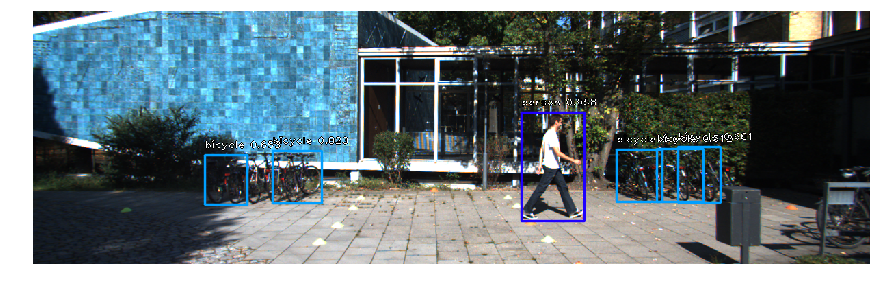

In [8]:
%run /Users/rblin/Downloads/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

## YOLO v1 ##

Voici un test de la reconnaissance des composants d'une image de la BD KITTI avec le réseau YOLO pré-entraîné.

Classes apprises : "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train","tvmonitor"

Vitesse en théorie : de 45 frames par seconde jusqu'à 150 frames par secondes.

### Architecture du réseau ###

- En entrée on a une image ;
- L'image est divisée en une grille de taille SxS ;
- En parallèle sont calculés les bounding boxes et la carte de probabilité de classes (chaque case de la grille de taille SxS est associée à la classe à laquelle il est le plus probable qu'elle appartienne) ;
- Les bounding boxes sont recoupées avec la carte de probabilité de classes ;
- Les détections finales issues de ce recoupement sont en sortie du réseau.

Le réseau est un FCNN (Full Convolutional Neural Network)

processing time : 3.8219809532165527 secs


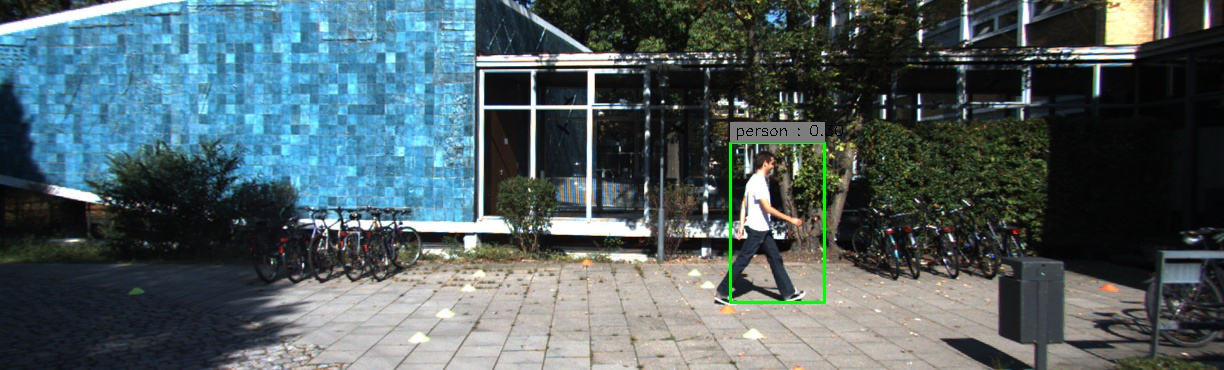

In [8]:
import os
os.system("python /Users/rblin/Downloads/YOLO_tensorflow-master/YOLO_small_tf.py -fromfile '/Users/rblin/Downloads/keras-retinanet-master/examples/000000.png' -tofile_img '/Users/rblin/Documents/000000_yolo.jpg' -tofile_txt '/Users/rblin/Documents/000000.txt'")

from IPython.display import Image
print("processing time : 3.8219809532165527 secs")
Image('/Users/rblin/Documents/000000_yolo.jpg')

## YOLO v3 ##

Voici un test de la reconnaissance des composants d'une image de la BD KITTI avec le réseau YOLO v3 pré-entraîné.

Classes apprises : "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train","tvmonitor"

### Architecture du réseau ###

Principe similaire à YOLO mais le réseau est plus lent ( 30 frames par secondes) mais plus précis.

processing time : 0.052018 seconds.


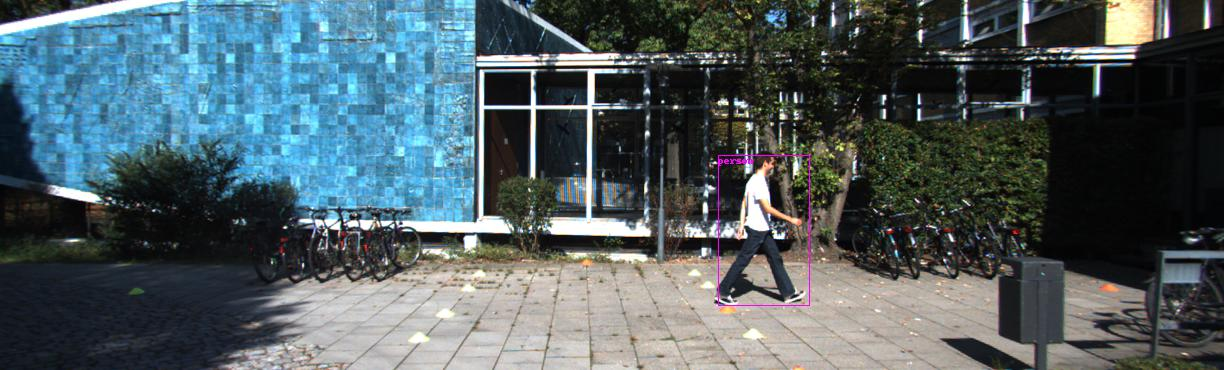

In [9]:
# se connecter en ssh à rblin@geoff.litislab.fr car le programme ne marche qu'à l'aide d'un GPU

# rappel des commandes à exécuter pour obtenir l'image 

"""import os
os.system("ssh rblin@geoff.litislab.fr")
os.system("source ~/tensorflow/venv/bin/activate")
os.system("python pytorch-yolo3-python3/detect.py cfg/yolov3.cfg pytorch-yolo3-python3/yolov3.weights pytorch-yolo3-python3/000000.jpg")
os.system("scp rblin@geoff.litislab.fr:/home/rblin/pytorch-yolo3-python3/predictions.jpg /Users/rblin/Documents/")
"""
from IPython.display import Image

print("processing time : 0.052018 seconds.")
Image('/Users/rblin/Documents/predictions.jpg')

Il est à noter que les réseaux sur lesquels ont été entraînés YOLOv1 et YOLOv3 ne contiennent pas la classe vélo c'est pour cela que ceux-ci ne sont pas détectés.

## Selective search ##

Test de la recherche de régions avec l'algorithme selective search  sur la même image.

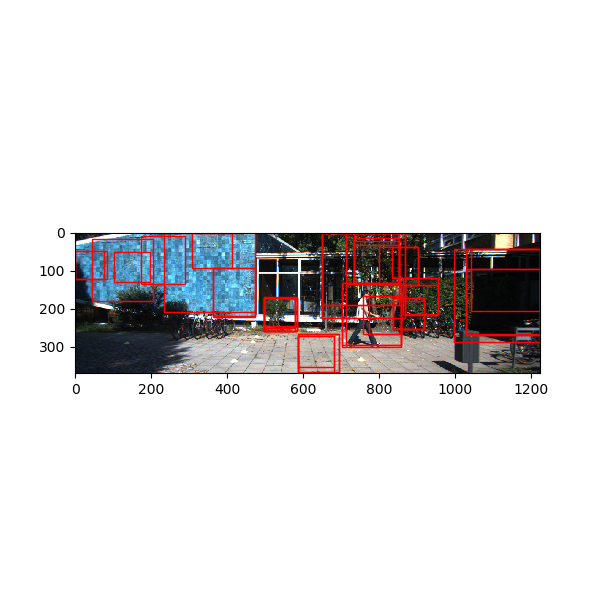

In [41]:
import os
os.system("python /Users/rblin/Downloads/selectivesearch-develop/example/example.py")

from IPython.display import Image
Image('/Users/rblin/Downloads/selectivesearch-develop/test000000.png')

## SSD ##

Voici un test de la reconnaissance des composantes d'une image de la BD KITTI avec le réseau SSD pré-entraîné.

Classes apprises : "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train","tvmonitor"

Vitesse : 45 à 19 frames par seconde

### Architecture du réseau ###

- L'image est passée en entrée d'un réseau basé sur l'architecture de VGG16 (bonne performance sur les images de haute qualité) à laquelle on a enlevé les couches fully connected pour y mettre des couches de convolution ;
- Ensuite, il y a une regression de bounding box à l'aide de la méthode MultiBox (réseau de neurones convolutif) ;

processing time : 2.1513049602508545


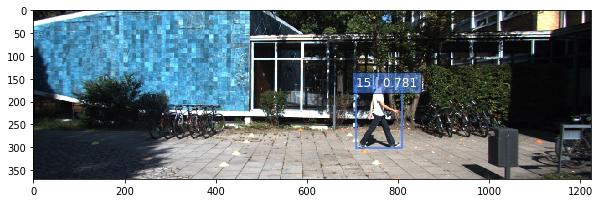

In [7]:
#import os
#os.system(cd "Users/rblin/Download/SSD-Tensorflow-master/notebooks/ssd_notebook.ipynb")

from IPython.display import Image

print("processing time : 2.1513049602508545")

Image('/Users/rblin/Downloads/000000_ssd.png')



In [ ]:
# start = time.time() time.time() - start) au moment du model.predict()